In [ ]:
! pip install scikit-learn
! pip install seaborn

In [19]:
import numpy as np 
import matplotlib.pyplot as plt
import time
import math
import seaborn as sns

In [12]:
a=np.arange(1,9,2)
print(a)

print(a.min())
print(a.max())



[1 3 5 7]
1
7


In [86]:
len(a)

4

$$ \mu = \frac{1}{n} \sum_{i=1}^{n} x_i $$

In [88]:
print(a.sum()/len(a))

a.mean()

4.0


4.0

$$ \sigma^2 = {\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2} $$


In [15]:
print(sum((a-np.mean(a))**2) / len(a))

print(a.var())

5.0
5.0


### Среднеквадратическое отклонение

$$ \sigma = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (x_i - \mu)^2} $$


In [17]:
print(np.sqrt(sum((a-np.mean(a))**2) / len(a)))

print(a.std())

2.23606797749979
2.23606797749979


In [1313]:
n_points = 500
x1 = 2 * np.random.rand(n_points, 1).reshape(n_points)
y = 4 + 3 * x1 + np.random.randn(n_points, 1).reshape(n_points)



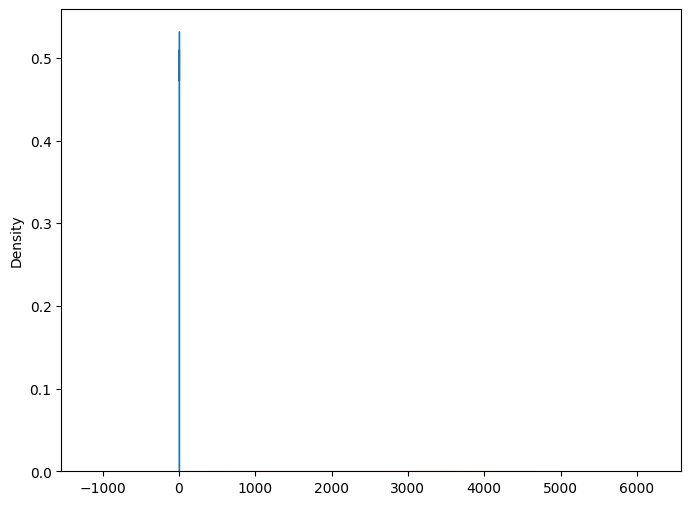

In [23]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
x2=np.random.randint(50,5000, size=n_points)
noise = np.random.randn(n_points) * 50
w1 = 3.5  
w2 = 0.02 
y = w1 * x1 + w2 * x2 + noise

plt.figure(figsize=(8,6))
sns.kdeplot(x=x1, label="x1", fill=True)
sns.kdeplot(x=x2, label="x2", fill=True)

plt.show()
# plt.scatter(x1,y)
# plt.show()
# plt.scatter(x2,y)
# plt.show()

In [26]:
print(x1.std(),x1.mean())
print(x2.std(),x2.mean())

0.5689304693890075 1.0070809921093473
1426.2269904766213 2529.806


In [1316]:
def GD_multi(x,y,alpha=0.001,iter=100):
    n_samples, n_features = x.shape  
    
    theta = np.array([-7,-10])
    trajectory = [(theta[0],theta[1])]
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)
        
        theta = theta - alpha * gradient
        trajectory.append((theta[0],theta[1]))
            
        
        
    return theta,trajectory

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))
    
def mse_loss(w0, w1, x1,x2, y):
    y_pred = w0 * x1 + w1 * x2 
    return np.mean((y - y_pred) ** 2)

-239.31421723186546 220.32460704312834
[-4.58522128 -0.00333483]


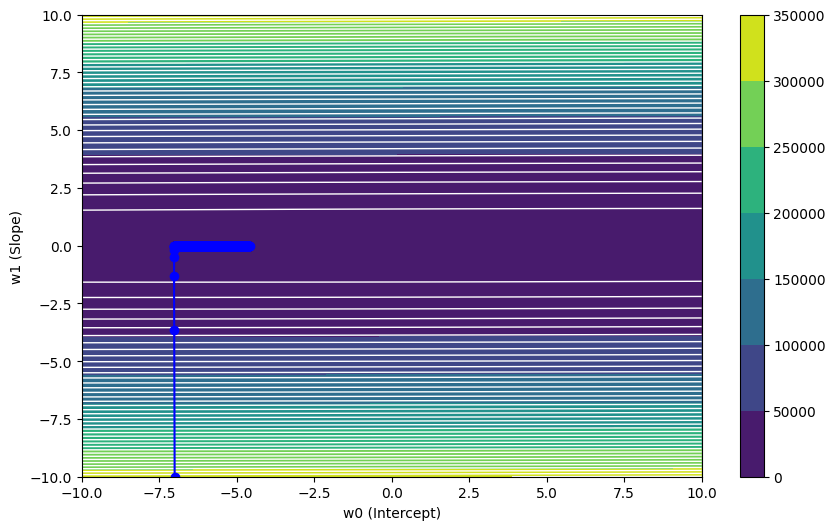

In [1330]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50 # 1,2,4,5,10
print(min(x2),max(x2))
w1 = 3.5  
w2 = 0.02 
y = w1 * x1 + w2 * x2 
X=np.column_stack((x1,x2))
w,trajectory=GD_multi(X,y,iter=1000,alpha=0.0001) #0.01,0.001 , .0001
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1,x2, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [1326]:

print(np.std(X))

40.35778321800106


In [27]:
def z_score_scaling(data):    
    mean = np.mean(data, axis=0)
    std_dev = np.std(data, axis=0)    
    scaled_data = (data - mean) / std_dev
    return scaled_data

In [28]:
x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

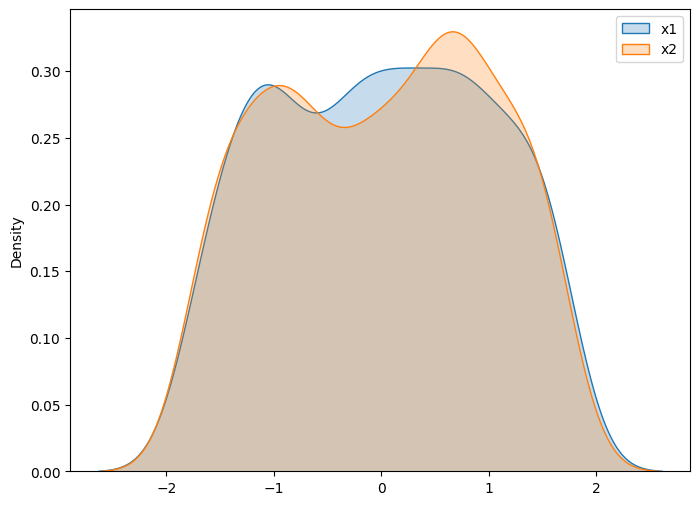

In [1328]:
X_scaling=z_score_scaling(X)

print(np.std(X_scaling))

0.9999999999999997


In [244]:
np.set_printoptions(suppress=True)


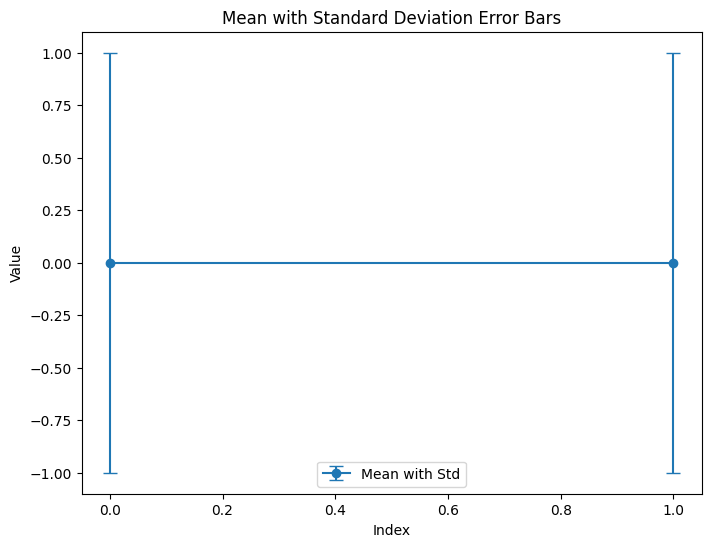

In [1331]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x = np.arange(len(mean))

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean, yerr=std, fmt='-o', capsize=5, label='Mean with Std')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean with Standard Deviation Error Bars')
plt.legend()

plt.show()

[3.52 0.  ]


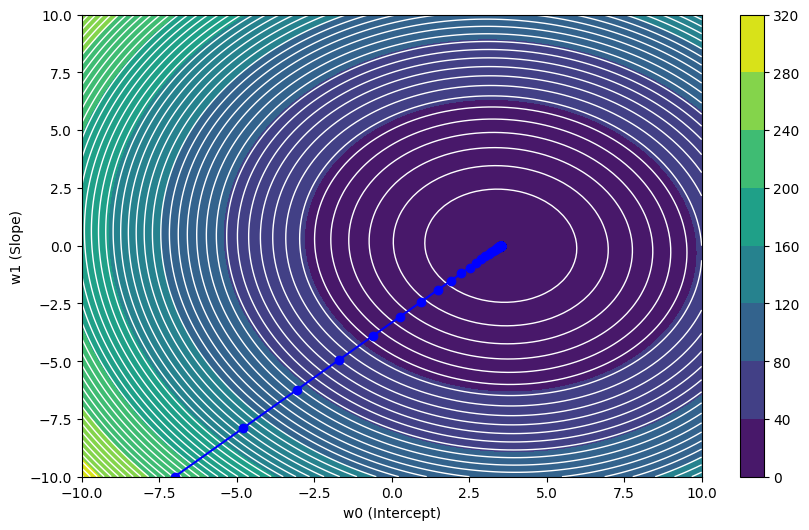

In [1332]:
x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)
w1 = 3.5  
w2 = 0.02 
y = w1 * x1_scaling + w2 * x1_scaling 
X=np.column_stack((x1_scaling,x2_scaling))
w,trajectory=GD_multi(X,y,iter=1000,alpha=0.1)
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [32]:
def Mean_Normal(data):    
    mean = np.mean(data, axis=0)
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)    
    normalized_data = (data - mean) / (max_val - min_val)
    
    return normalized_data

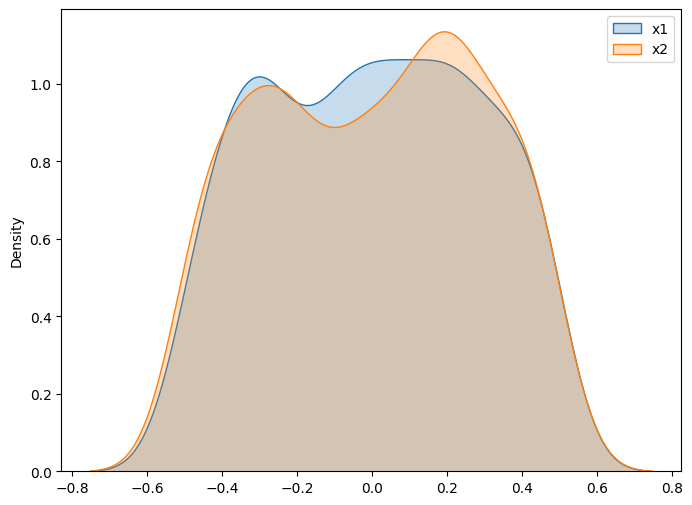

In [33]:
x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)
plt.figure(figsize=(8,6))
sns.kdeplot(x=x1_scaling, label="x1", fill=True)
sns.kdeplot(x=x2_scaling, label="x2", fill=True)
plt.legend()
plt.show()

In [1337]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

print(f"mean {np.mean(x1):2f} min {np.min(x1)} max {np.max(x1)}")
x1_n=Mean_Normal(x1)
print(f"mean {np.mean(x1_n):2f} min {np.min(x1_n)} max {np.max(x1_n)}")

mean 0.994993 min 0.008741289572024469 max 1.9998019540184633
mean -0.000000 min -0.49533967797662354 max 0.5046603220233764


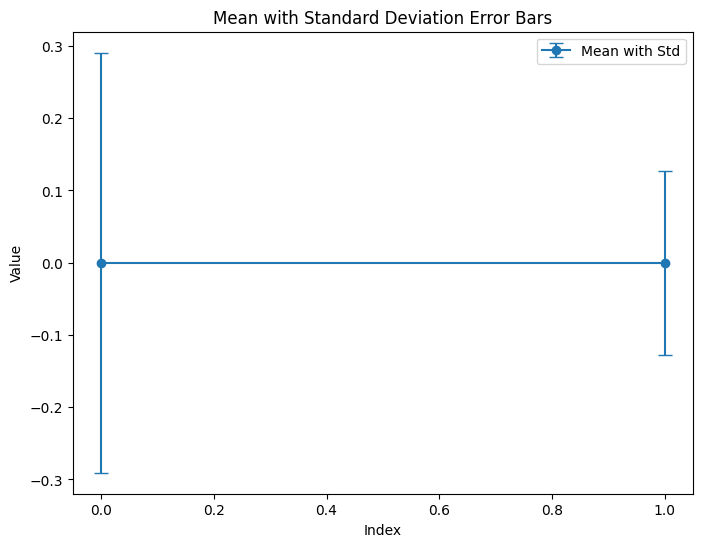

mean -0.000000 min -0.5028247168272361 max 0.49717528317276394


In [1336]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)

X=np.column_stack((x1_scaling,x2_scaling))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x = np.arange(len(mean))

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean, yerr=std, fmt='-o', capsize=5, label='Mean with Std')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean with Standard Deviation Error Bars')
plt.legend()

plt.show()


[ 3.49483717 -1.15409511]


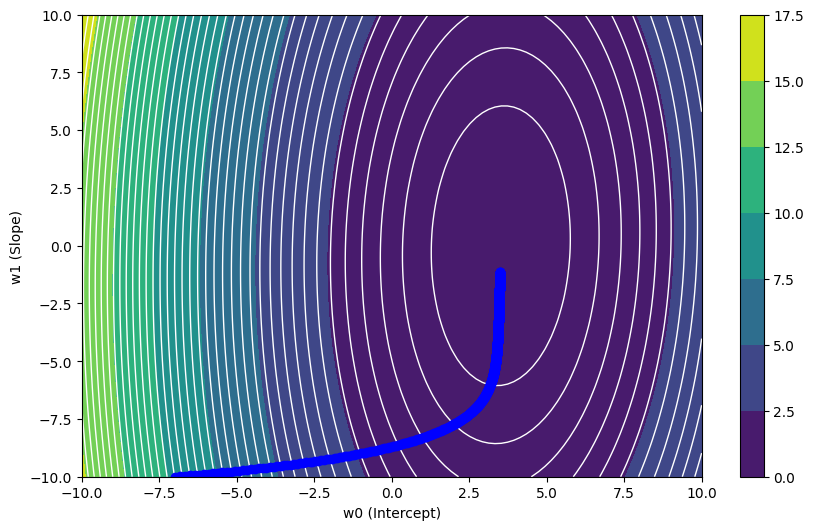

In [1343]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

#x1_scaling=x1
#x2_scaling=x2

x1_scaling=Mean_Normal(x1)
x2_scaling=Mean_Normal(x2)
w1 = 3.5  
w2 = 0.02 
y = w1 * x1_scaling + w2 * x1_scaling 
X=np.column_stack((x1_scaling,x2_scaling))


w,trajectory=GD_multi(X,y,iter=1000,alpha=0.1)
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [1344]:
def MinMax(data):    
    
    min_val = np.min(data, axis=0)
    max_val = np.max(data, axis=0)    
    normalized_data = (data - min_val) / (max_val - min_val)
    
    return normalized_data

In [1345]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50


x1_n=MinMax(x1)
print(f"mean {np.mean(x1_n):2f} min {np.min(x1_n)} max {np.max(x1_n)}")

mean 0.483207 min 0.0 max 1.0


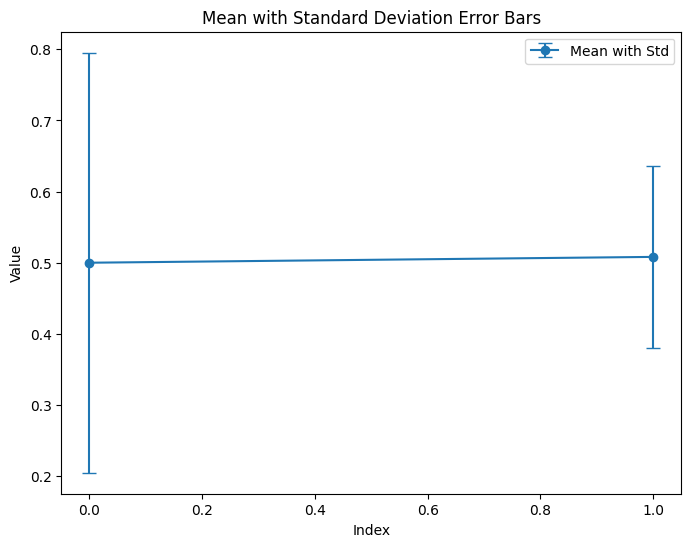

In [1346]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=MinMax(x1)
x2_scaling=MinMax(x2)

X=np.column_stack((x1_scaling,x2_scaling))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x = np.arange(len(mean))

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean, yerr=std, fmt='-o', capsize=5, label='Mean with Std')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean with Standard Deviation Error Bars')
plt.legend()

plt.show()

[3.51999517 0.00000495]


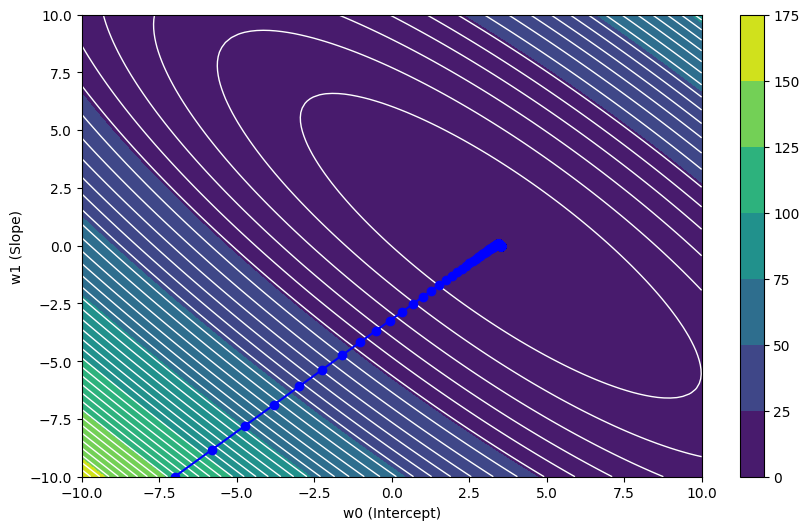

In [1349]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*5
x1_scaling=MinMax(x1)
x2_scaling=MinMax(x2)
w1 = 3.5  
w2 = 0.02 
y = w1 * x1_scaling + w2 * x1_scaling 
X=np.column_stack((x1_scaling,x2_scaling))

w,trajectory=GD_multi(X,y,iter=1000,alpha=0.1)
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

In [1351]:
def MaxScaling(data):    
    
    
    max_val = np.max(data, axis=0)    
    normalized_data = data  / (np.abs(max_val))
    
    return normalized_data

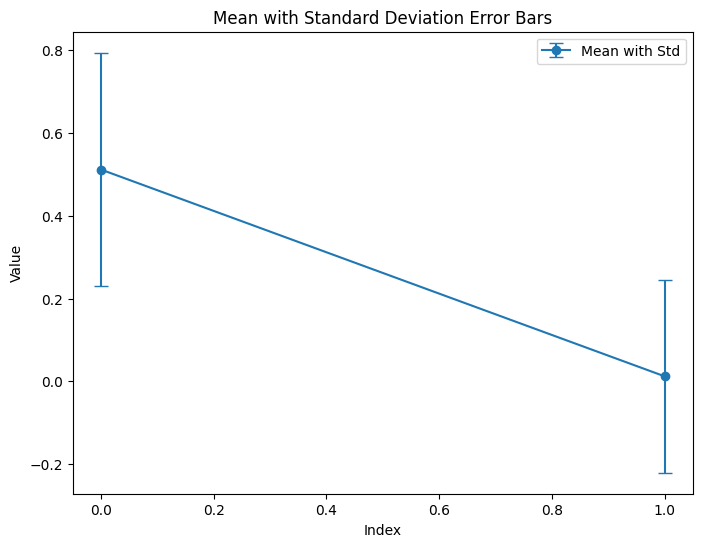

In [1352]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=MaxScaling(x1)
x2_scaling=MaxScaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x = np.arange(len(mean))

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean, yerr=std, fmt='-o', capsize=5, label='Mean with Std')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean with Standard Deviation Error Bars')
plt.legend()

plt.show()

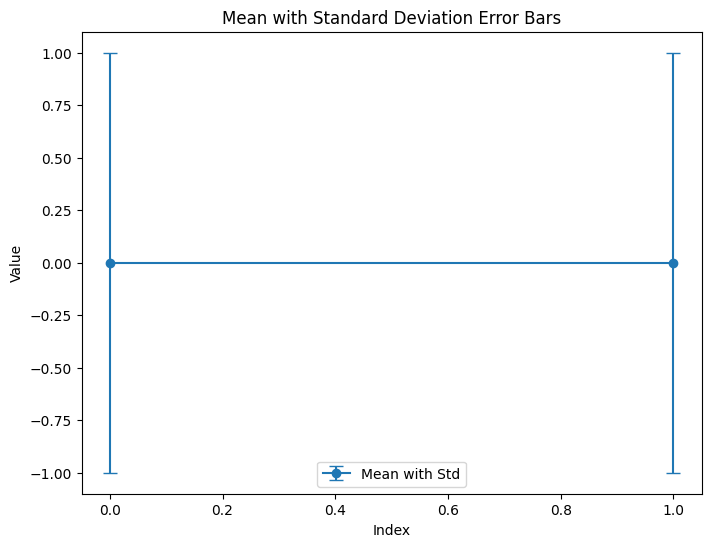

In [1353]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*50

x1_scaling=z_score_scaling(x1)
x2_scaling=z_score_scaling(x2)

X=np.column_stack((x1_scaling,x2_scaling))
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
x = np.arange(len(mean))

plt.figure(figsize=(8, 6))
plt.errorbar(x, mean, yerr=std, fmt='-o', capsize=5, label='Mean with Std')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Mean with Standard Deviation Error Bars')
plt.legend()

plt.show()

[ 3.52000007 -0.00002199]


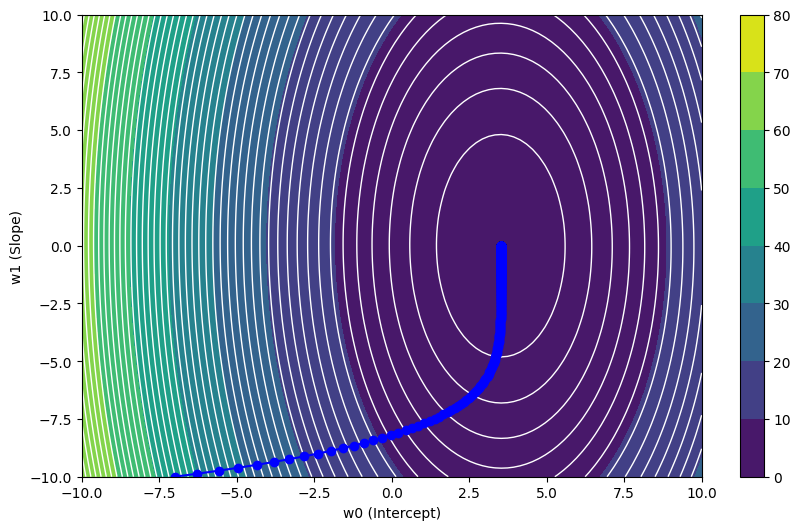

In [1354]:
n_points = 500
x1=2 * np.random.rand(n_points, 1).reshape(n_points)
noise = np.random.randn(n_points) 
x2=x1*noise*5
x1_scaling=MaxScaling(x1)
x2_scaling=MaxScaling(x2)
w1 = 3.5  
w2 = 0.02 
y = w1 * x1_scaling + w2 * x1_scaling 
X=np.column_stack((x1_scaling,x2_scaling))
w,trajectory=GD_multi(X,y,iter=1000,alpha=0.1)
print(w)

theta_0=np.linspace(-10,10,100)
theta_1=np.linspace(-10,10,100)
t0, t1 = np.meshgrid(theta_0, theta_1)
Z = np.array([[mse_loss(t0, t1, x1_scaling,x2_scaling, y) for t0 in theta_0] for t1 in theta_1])
plt.figure(figsize=(10,6))
cp = plt.contour(t0, t1, Z, colors='white', linewidths=1,levels=50)

cp = plt.contourf(t0, t1, Z )
plt.colorbar(cp)
plt.xlabel('w0 (Intercept)')
plt.ylabel('w1 (Slope)')
trajectory = np.array(trajectory)
plt.plot(trajectory[:, 0], trajectory[:, 1], 'bo-')
plt.show()

Orginal data ---> mean:0.9986657960305099  STD:0.5920253395126315
Scaling Data --> mean:-1.0658141036401503e-17  STD:1.0


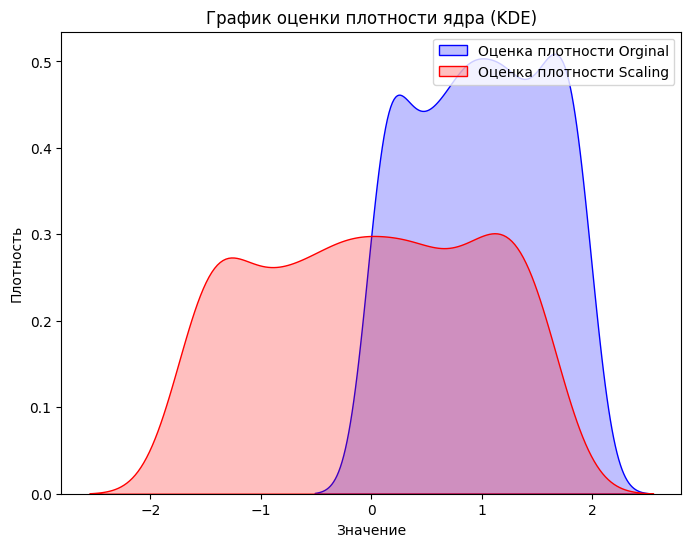

In [1355]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

data= 2 * np.random.rand(500, 1).reshape(500)

data_scaling=z_score_scaling(data)
print(f"Orginal data ---> mean:{np.mean(data)}  STD:{np.std(data)}")
print(f"Scaling Data --> mean:{np.mean(data_scaling)}  STD:{np.std(data_scaling)}")

plt.figure(figsize=(8, 6))
sns.kdeplot(data, fill=True, color="b", label="Оценка плотности Orginal")
sns.kdeplot(data_scaling, fill=True, color="r", label="Оценка плотности Scaling")


plt.xlabel('Значение')
plt.ylabel('Плотность')
plt.title('График оценки плотности ядра (KDE)')
plt.legend()

plt.show()



In [1356]:
def GD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient      
        
    return theta

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))
    
def mse_loss(w0, w1, x1,x2, y):
    y_pred = w0 * x1 + w1 * x2 
    return np.mean((y - y_pred) ** 2)

In [324]:
from sklearn.linear_model import LinearRegression

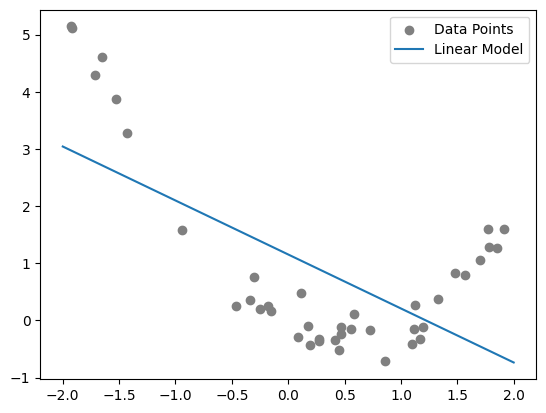

In [332]:
np.random.seed(0)
x = np.random.rand(40, 1) * 4 - 2  
y = x**2 - x + np.random.randn(40, 1) * 0.3  
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)


#Linear model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_linear = linear_model.predict(x_test)
plt.scatter(x,y,label="Data Points",color='gray')

plt.plot(x_test,y_linear,label="Linear Model")
plt.legend()
plt.show()


In [380]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

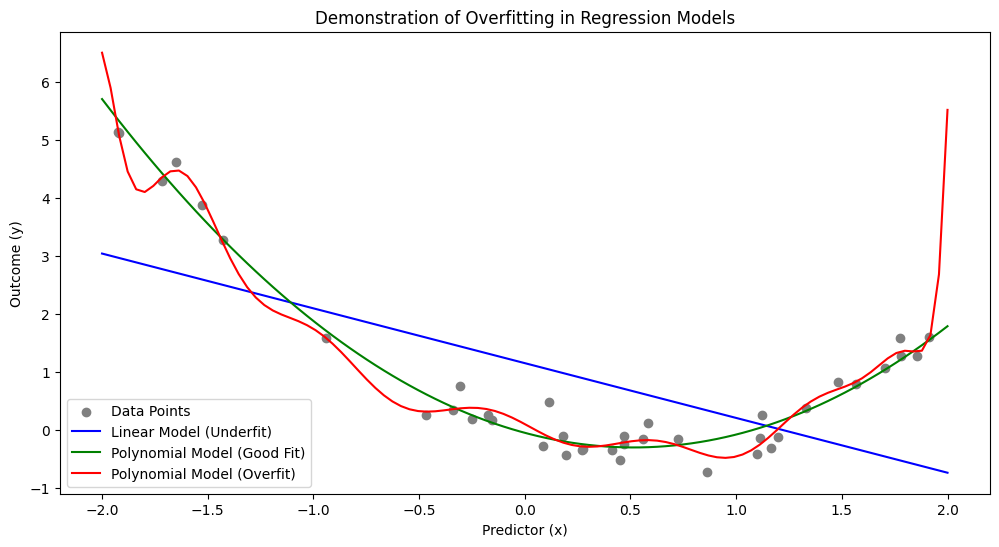

In [392]:
np.random.seed(0)
x = np.random.rand(40, 1) * 4 - 2  
y = x**2 - x + np.random.randn(40, 1) * 0.3 

#Linear Regression (Underfitting)
linear_model = LinearRegression()
linear_model.fit(x, y)

#Polynomial Regression (Good Fit)
poly_model_good = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
poly_model_good.fit(x, y)

#Polynomial Regression (Overfitting)
poly_model_overfit = make_pipeline(PolynomialFeatures(degree=15), LinearRegression())
poly_model_overfit.fit(x, y)

#Generating test data for plotting
x_test = np.linspace(-2, 2, 100).reshape(-1, 1)

# Predictions
y_linear = linear_model.predict(x_test)
y_poly_good = poly_model_good.predict(x_test)
y_poly_overfit = poly_model_overfit.predict(x_test)

# Plotting
plt.figure(figsize=(12, 6))

plt.scatter(x, y, color='gray', label='Data Points')

plt.plot(x_test, y_linear, label='Linear Model (Underfit)', color='blue')
plt.plot(x_test, y_poly_good, label='Polynomial Model (Good Fit)', color='green')
plt.plot(x_test, y_poly_overfit, label='Polynomial Model (Overfit)', color='red')

plt.xlabel('Predictor (x)')
plt.ylabel('Outcome (y)')
plt.title('Demonstration of Overfitting in Regression Models')
plt.legend()

plt.show()

In [389]:
print(linear_model.coef_,linear_model.intercept_)

[[-0.94420117]] [1.15346078]


In [390]:
coefficients = poly_model_good.named_steps['linearregression'].coef_
intercept = poly_model_good.named_steps['linearregression'].intercept_

print(coefficients,intercept)

[[ 0.         -0.97858869  0.94849654]] [-0.04699912]


In [391]:
coefficients = poly_model_overfit.named_steps['linearregression'].coef_
intercept = poly_model_overfit.named_steps['linearregression'].intercept_

print(coefficients,intercept)

[[   0.           -0.45133288   -5.01857804  -24.17631615   67.98563377
   185.26539973 -352.27720664 -447.59007805  772.46366955  510.79631397
  -872.75247198 -322.15742659  566.90587616  118.99606406 -220.97176269
   -25.62676871   51.16403342    2.97563059   -6.49570419   -0.1435814
     0.34861036]] [0.13985754]


In [912]:
def GD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient      
        
    return theta

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))

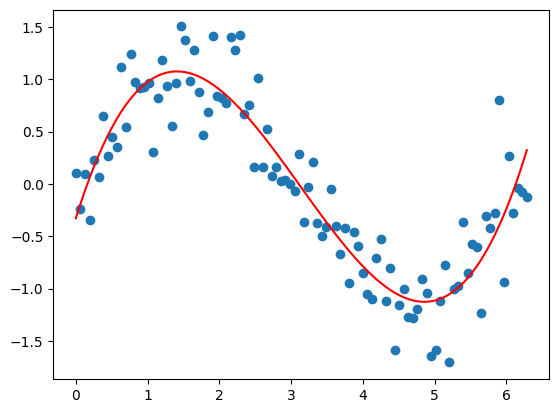

In [913]:
n=100
x1=np.linspace(0,2*math.pi,n)
y=np.sin(x1)+ 0.3 * np.random.randn(n)


plt.scatter(x1,y)
X=add_bias_feature(x1)

x2=x1**2
x3=x1**3
#X=np.column_stack((X,x2))
X=np.column_stack((X,x2,x3))

theta = GD_multi(X,y,alpha=0.0001,iter=10000)
#coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
#print(theta)
#y_pred= X @ theta.T
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
y_pred = X @ coefficients

plt.plot(x1,y_pred,color="red")

plt.show()

In [478]:
def Lagrange_basis(x, i, x_value):
    n = len(x)
    term = 1
    for j in range(n):
        if i != j:
            term *= (x_value - x[j]) / (x[i] - x[j])
    return term

def generate_lagrange_features(x, y, x_values):
    n = len(x_values)
    m = len(x)
    features = np.zeros((n, m))
    
    for i in range(n):  
        for j in range(m):  
            features[i, j] = Lagrange_basis(x, j, x_values[i])
    
    return features



In [539]:
def Lagrange_polynomial(x, y, x_value):
    n = len(x)
    result = 0

    for i in range(n):
        term = y[i]
        for j in range(n):
            if i != j:
                term = term * (x_value - x[j]) / (x[i] - x[j])
        result += term

    return result




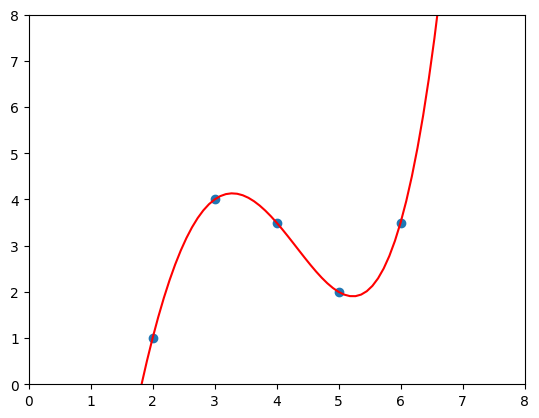

In [525]:
x=np.array([2,3,4,5,6])
y=np.array([1,4,3.5,2,3.5])
plt.scatter(x,y)

x_plot = np.linspace(0, 9, 100)
y_plot = np.array([Lagrange_polynomial(x, y, xi) for xi in x_plot])
plt.plot(x_plot, y_plot, label='Lagrange Polynomial', color='red')

plt.ylim(0,8)
plt.xlim(0,8)
plt.show()

[-18.          12.95833333  -1.0625      -0.45833333   0.0625    ]


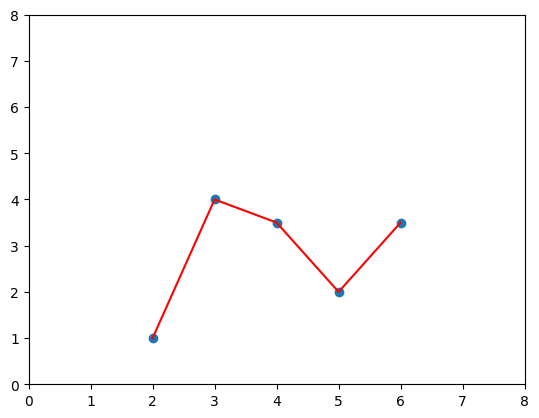

In [518]:
x1=np.array([2,3,4,5,6])
y=np.array([1,4,3.5,2,3.5])
plt.scatter(x1,y)


X=add_bias_feature(x1)
x2=x1**2
x3=x1**3
x4=x1**4

#X=np.column_stack((X,x2))
X=np.column_stack((X,x2,x3,x4))
coefficients = np.linalg.inv(X.T @ X) @ X.T @ y
print(coefficients)
y_pred = X @ coefficients

plt.plot(x1,y_pred,color="red")

plt.ylim(0,8)
plt.xlim(0,8)
plt.show()

In [523]:
x_new=np.array([1])

x2=x_new**2
x3=x_new**3
x4=x_new**4

X=np.column_stack(([1],x_new,x2,x3,x4))

X @ coefficients

array([-6.5])

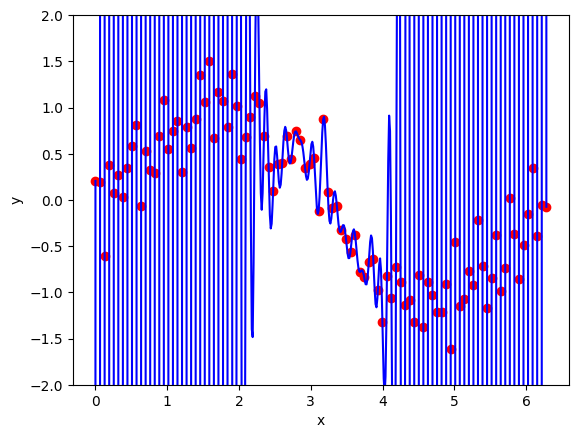

In [557]:
n = 100
x1 = np.linspace(0, 2 * math.pi, n)
y = np.sin(x1) + 0.3 * np.random.randn(n) 

x_plot = np.linspace(0, 2 * math.pi, 500)  
y_plot = np.array([Lagrange_polynomial(x1, y, xi) for xi in x_plot])


plt.plot(x_plot, y_plot, color='blue')

plt.scatter(x1, y, color='red')


plt.xlabel('x')
plt.ylabel('y')

plt.ylim(-2,2)

plt.show()


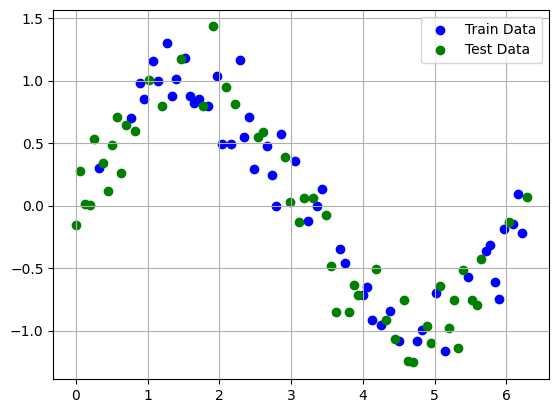

In [1040]:
n=100
x_train=np.linspace(0,2*math.pi,n)
x_test = np.random.choice(x_train, 50, replace=False)
x_train = np.setdiff1d(x_train, x_test)

y_train=np.sin(x_train)+ 0.22 * np.random.randn(len(x_train))
y_test=np.sin(x_test)+ 0.22 * np.random.randn(len(x_test))

plt.scatter(x_train,y_train,color="blue",label="Train Data")
plt.scatter(x_test,y_test,color="green",label="Test Data")

plt.legend()
plt.grid()
plt.show()

In [938]:
def GD_multi(x,y,alpha=0.1,iter=100):
    n_samples, n_features = x.shape  
   
    theta = np.zeros(n_features)    
       
    for _ in range(iter):
        y_pred=x.dot(theta)
        gradient = (2 / n_samples) * x.T.dot(y_pred - y)        
        theta = theta - alpha * gradient      
        
    return theta.reshape(-1,1)

def add_bias_feature(X):     
     return np.column_stack((np.ones(len(X)), X))


In [1049]:
def mse(y,y_pred):
    return np.sum(np.square(y-y_pred)) / y.shape[0]
    

In [93]:
def r2(y_true, y_pred):    
    y_mean = np.mean(y_true)    
    
    ss_total = np.sum((y_true - y_mean) ** 2)    
    
    ss_residual = np.sum((y_true - y_pred) ** 2)    
    
    r2_score = 1 - (ss_residual / ss_total)
    
    return r2_score

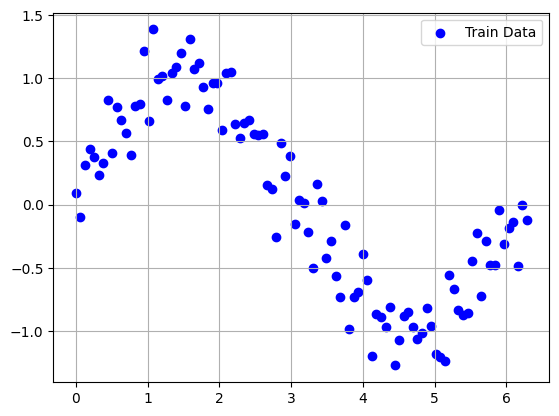

In [1061]:
n=100
x_train=np.linspace(0,2*math.pi,n)

y_train=np.sin(x_train)+ 0.22 * np.random.randn(len(x_train))

plt.scatter(x_train,y_train,color="blue",label="Train Data")

plt.legend()
plt.grid()
plt.show()

In [1098]:
a=np.array([[1,2],[4,5]])
print(a)
poly = PolynomialFeatures(3,include_bias=False,interaction_only=True)
X=poly.fit_transform(a)
print(X)
print()
poly = PolynomialFeatures(3,include_bias=True,interaction_only=False)
X=poly.fit_transform(a)
print(X)

[[1 2]
 [4 5]]
[[ 1.  2.  2.]
 [ 4.  5. 20.]]

[[  1.   2.   1.   2.   4.   1.   2.   4.   8.]
 [  4.   5.  16.  20.  25.  64.  80. 100. 125.]]


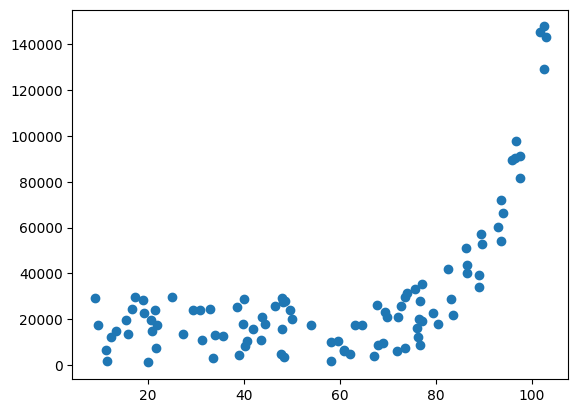

In [91]:
data=np.genfromtxt('gen_regression.csv', delimiter=',')

sorted_indices = np.argsort(data[:,0])


X_train = data[:, :-1][sorted_indices]  
y_train = data[:, -1][sorted_indices] 
plt.scatter(X_train,y_train)



R2:0.5487807071113845


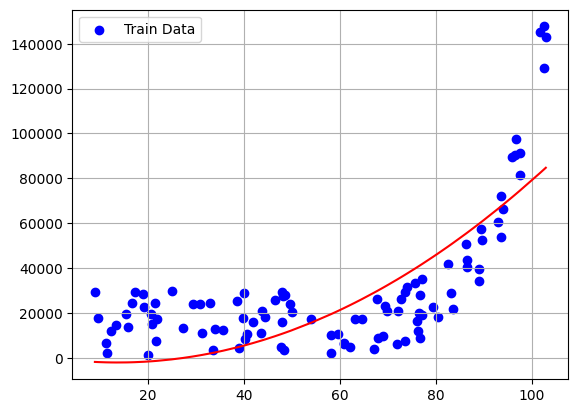

In [1197]:

poly = PolynomialFeatures(2,include_bias=False,interaction_only=False)
X=poly.fit_transform(X_train.reshape(-1,1))

theta = np.linalg.inv(X.T @ X) @ X.T @ y_train

y_train_pred=X@theta


plt.scatter(X_train,y_train,color="blue",label="Train Data")

plt.plot(X_train,y_train_pred,color="red")

print(f"R2:{r2(y_train,y_train_pred)}")

plt.legend()
plt.grid()
plt.show()

NameError: name 'r2' is not defined

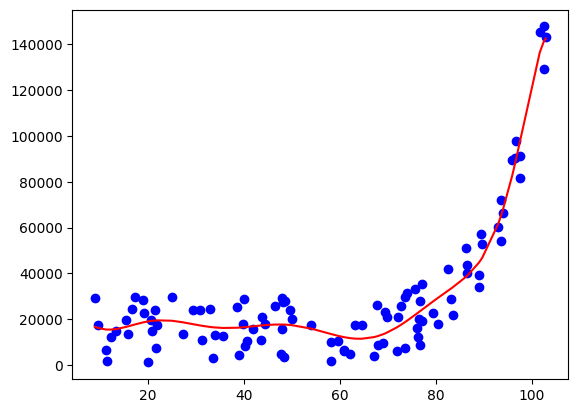

In [92]:
poly = PolynomialFeatures(10,include_bias=False,interaction_only=False)
X=poly.fit_transform(X_train.reshape(-1,1))
linear_model = LinearRegression()
linear_model.fit(x, y)
plt.scatter(X_train,y_train,color="blue",label="Train Data")

plt.plot(X_train,y_train_pred,color="red")

print(f"R2:{r2(y_train,y_train_pred)}")

plt.legend()
plt.grid()
plt.show()

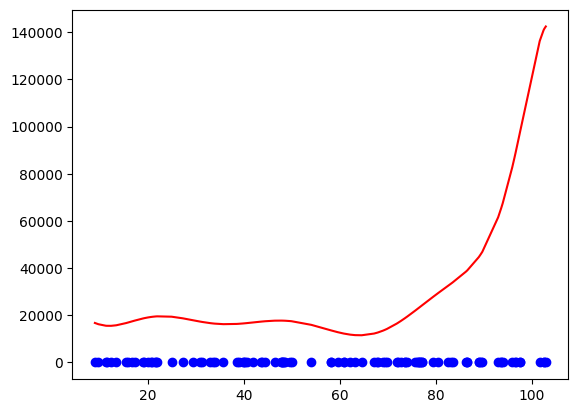

In [95]:
n=100
x_train=np.linspace(0,2*math.pi,n)

y_train=np.sin(x_train)+ 0.22 * np.random.randn(len(x_train))


poly = PolynomialFeatures(2,include_bias=False,interaction_only=False)
X=poly.fit_transform(X_train.reshape(-1,1))

linear_model = LinearRegression()
linear_model.fit(X, y_train)

plt.scatter(X_train,y_train,color="blue",label="Train Data")

plt.plot(X_train,y_train_pred,color="red")


(100, 2)
R2:0.4268660579115968


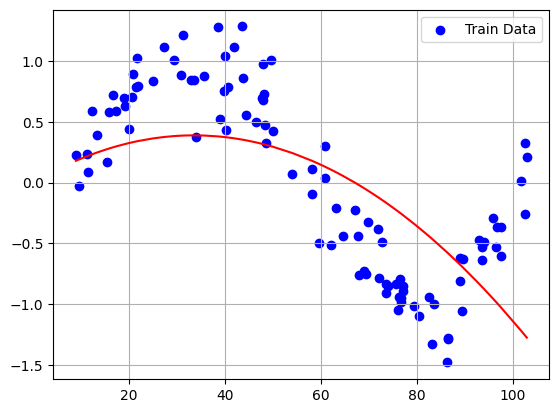

In [1221]:
n=100
x_train=np.linspace(0,2*math.pi,n)

y_train=np.sin(x_train)+ 0.22 * np.random.randn(len(x_train))


poly = PolynomialFeatures(2,include_bias=False,interaction_only=False)
X=poly.fit_transform(X_train.reshape(-1,1))
print(X.shape)
theta = np.linalg.inv(X.T @ X) @ X.T @ y_train

y_train_pred=X@theta


plt.scatter(X_train,y_train,color="blue",label="Train Data")

plt.plot(X_train,y_train_pred,color="red")

print(f"R2:{r2(y_train,y_train_pred)}")

plt.legend()
plt.grid()
plt.show()

In [80]:
import pandas as pd
data = pd.read_csv("house_data.csv")
data.head()

id             date     price  bedrooms  bathrooms  sqft_living  \
0  7129300520  20141013T000000  221900.0         3       1.00         1180   
1  6414100192  20141209T000000  538000.0         3       2.25         2570   
2  5631500400  20150225T000000  180000.0         2       1.00          770   
3  2487200875  20141209T000000  604000.0         4       3.00         1960   
4  1954400510  20150218T000000  510000.0         3       2.00         1680   

   sqft_lot  floors  waterfront  view  ...  grade  sqft_above  sqft_basement  \
0      5650     1.0           0     0  ...      7        1180              0   
1      7242     2.0           0     0  ...      7        2170            400   
2     10000     1.0           0     0  ...      6         770              0   
3      5000     1.0           0     0  ...      7        1050            910   
4      8080     1.0           0     0  ...      8        1680              0   

   yr_built  yr_renovated  zipcode      lat     long  sqft_living15  \
0      1955             0    98178  47.5112 -122.257           1340   
1      1951          1991    98125  47.7210 -122.319           1690   
2      1933             0    98028  47.7379 -122.233           2720   
3      1965             0    98136  47.5208 -122.393           1360   
4      1987             0    98074  47.6168 -122.045           1800   

   sqft_lot15  
0        5650  
1        7639  
2        8062  
3        5000  
4        7503  

[5 rows x 21 columns]

In [81]:
y = data.price
X = data.drop(["id", "date", "price"], axis=1)

In [82]:
y=y.to_numpy()
X=X.to_numpy()

In [41]:
X.shape

(21613, 18)

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


Coef [-3.57665414e+04  4.11442785e+04  1.10442864e+02  1.28597869e-01
  6.68955012e+03  5.82960458e+05  5.28709424e+04  2.63856491e+04
  9.58904452e+04  7.07852245e+01  3.96576401e+01 -2.62022321e+03
  1.98125837e+01 -5.82419866e+02  6.02748226e+05 -2.14729828e+05
  2.16814005e+01 -3.82641850e-01]
Intercept 6690324.603079374
0.6997471890109157


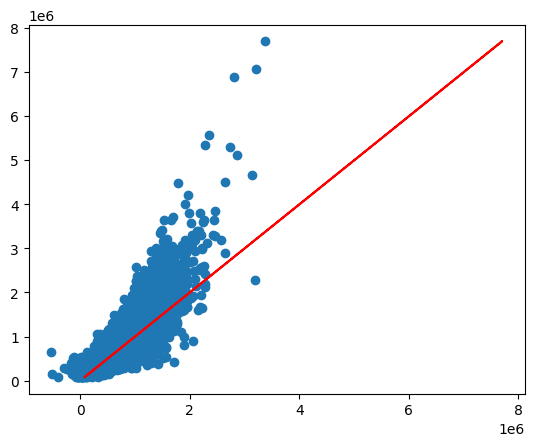

In [84]:
model=LinearRegression()
model.fit(X,y)

print(f"Coef {model.coef_}")
print(f"Intercept {model.intercept_}")
y_pred = model.predict(X)
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')
print(model.score(X, y))

In [85]:
transformation = PolynomialFeatures(degree=2)
X_2 = transformation.transform(X)
poly_2d = LinearRegression().fit(X_2, y)



NotFittedError: This PolynomialFeatures instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [78]:

n_samples, n_features = 10, 5
X = np.random.randn(n_samples, n_features)
y = np.random.randn(n_samples)
model=SGDRegressor(max_iter=1000,alpha=0.01)
model.fit(X,y)


y_pred = model.predict(X)
print(model.score(X, y))

0.3148700469683615


In [73]:
from sklearn.linear_model import SGDRegressor
